<h1>
    Sommaire<span class="tocSkip"></span>
</h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-1">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>Chargement des données
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Segmentation-RFM-:-baseline" data-toc-modified-id="Segmentation-RFM-:-baseline-2">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>Segmentation RFM : baseline
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Automatique" data-toc-modified-id="Automatique">
                            <span class="toc-item-num">2.1.&nbsp;&nbsp;</span>Automatique
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Manuelle" data-toc-modified-id="Manuelle">
                            <span class="toc-item-num">2.2.&nbsp;&nbsp;</span>Manuelle
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Segmentation-kmeans-sur-plusieurs-variables-numériques" data-toc-modified-id="Segmentation-kmeans-sur-plusieurs-variables-numériques-3">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>Segmentation kmeans sur plusieurs variables numériques
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Challenge-kmeans-avec-4-clusters" data-toc-modified-id="Challenge-kmeans-avec-4-clusters-31">
                            <span class="toc-item-num">3.1.&nbsp;&nbsp;</span>Challenge kmeans avec 4 clusters
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Segmentation-k-prototypes-sur-tout-type-de-variables" data-toc-modified-id="Segmentation-k-prototypes-sur-tout-type-de-variables-4">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>Segmentation k prototypes sur tout type de variables
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Analyse-de-la-stabilité-de-la-segmentation" data-toc-modified-id="Analyse-de-la-stabilité-de-la-segmentation-5">
                    <span class="toc-item-num">5.&nbsp;&nbsp;</span>Analyse de la stabilité de la segmentation
                </a>
            </span>
        </li>
    </ul>
</div>

In [1]:
import pandas as pd

dossier_data = "data/"
nom_fichier = "flipkart_com-ecommerce_sample_1050.csv"
produits_data = pd.read_csv(dossier_data+nom_fichier)

In [2]:
produits_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [3]:
produits_data.product_category_tree.sample(15)

481     ["Computers >> Laptop Accessories >> Batteries...
758     ["Home Furnishing >> Bed Linen >> Blankets, Qu...
714     ["Home Furnishing >> Bed Linen >> Blankets, Qu...
1034    ["Computers >> Laptop Accessories >> Computer ...
811     ["Home Furnishing >> Bed Linen >> Blankets, Qu...
619     ["Baby Care >> Infant Wear >> Baby Boys' Cloth...
700     ["Home Furnishing >> Kitchen & Dining Linen >>...
280     ["Watches >> Wrist Watches >> palito Wrist Wat...
463     ["Beauty and Personal Care >> Hair Care >> Hai...
425     ["Computers >> Computer Peripherals >> Portabl...
814     ["Home Furnishing >> Bed Linen >> Blankets, Qu...
623     ["Baby Care >> Infant Wear >> Baby Girls' Clot...
175     ["Kitchen & Dining >> Coffee Mugs >> Prithish ...
1020    ["Home Furnishing >> Curtains & Accessories >>...
329     ["Computers >> Network Components >> Routers >...
Name: product_category_tree, dtype: object

# Analyse et prétraitement des descriptions

## Tokenization, retrait de la ponctuation et mise en minuscules

In [4]:
produits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

Déjà, il n'y a pas de donnée manquante dans cette variable.

In [4]:
# Conservation de l'id et de la description pour la travailler et l'analyser
descriptions = produits_data[['uniq_id', 'description']].copy() 

In [5]:
descriptions

,uniq_id,description
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


In [6]:
import nltk

# conserve les mots d'au moins une lettre (supprime donc la ponctuation et les nombres)
tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')

# tokenization et mise en minuscules des descriptions
descriptions["description_tokenisee"] = ""
for index_ligne, ligne in descriptions.iterrows():
    descriptions.loc[index_ligne, "description_tokenisee"] = tokenizer.tokenize(ligne['description'].lower())

In [7]:
descriptions

,uniq_id,description,description_tokenisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo..."
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [8]:
def recuperer_ensemble_mots(descriptions_tokenisees):
    """
    Retourne la liste complète des mots de chacune des descriptions tokenisees.
    
    
    Paramètre :
        - descriptions_tokenisees : Series
    """
    
    liste_totalite_mots = []
    for index, description_tokenisee in descriptions_tokenisees.items():
        for mot in description_tokenisee:
            liste_totalite_mots.append(mot)
            
    return liste_totalite_mots

In [9]:
def calculer_frequences_apparitions_mots(liste_mots):
    """
    Calcule la fréquence d'apparition de chaque mot présent dans liste_mots et retourne 
    un DataFrame contenant ces fréquences.
    
    Paramètre : 
        - liste_mots : List
    """
    
    frequences_apparitions_mots = nltk.FreqDist(liste_mots)
    df_freq = pd.DataFrame.from_dict(frequences_apparitions_mots, orient='index', columns=['nb_apparitions'])
    df_freq.sort_values(by="nb_apparitions", ascending=False, inplace=True)
    return df_freq

In [10]:
liste_mots = recuperer_ensemble_mots(descriptions['description_tokenisee'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

**Top 50 des mots les plus utilisés dans l'ensemble des descriptions avant suppression des mots**

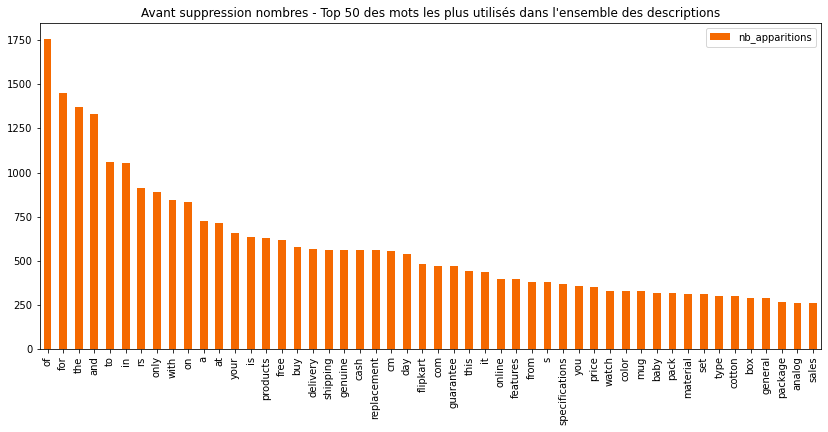

In [11]:
# Affichage des 50 mots les plus utilisés dans l'ensemble des descriptions
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)

titre = 'Avant suppression nombres - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

On voit clairement que les mots de liaisons sont les plus nombreux, ils seront supprimés lors de l'étape de suppression des stopwords. C'est le cas aussi des unités comme "rs", "cm", les nombres et le nom du site "flipkart.com", une suppression plus manuelle sera probablement à effectuer.

**Top 50 des mots les plus utilisés dans l'ensemble des descriptions après suppression des mots**

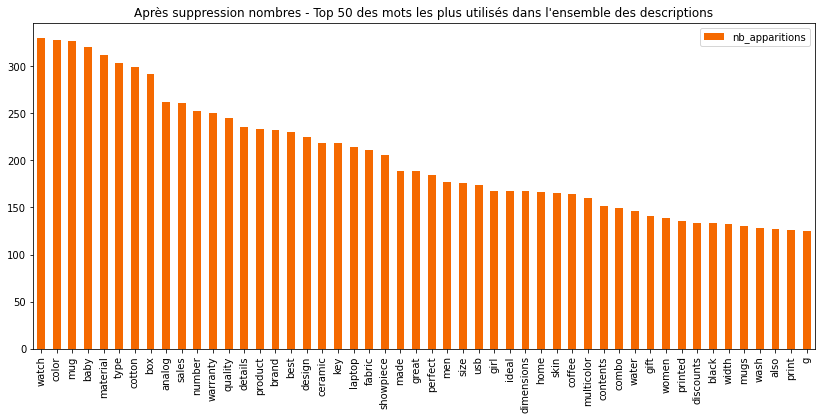

In [27]:
titre = 'Après suppression nombres - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

## Suppression des stopwords

In [13]:
# Récupération des stopwords en anglais
#nltk.download('stopwords') # une fois installé, affiche un warning
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
descriptions

,uniq_id,description,description_tokenisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo..."
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [15]:
# On retire les stopwords pour chaque description tokenisée
descriptions["description_sans_stopword"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_tokenisee = ligne["description_tokenisee"]
    descriptions.loc[index_ligne, "description_sans_stopword"] = [mot for mot in description_tokenisee if mot not in stopwords]

In [16]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,..."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic..."


In [17]:
liste_mots = recuperer_ensemble_mots(descriptions['description_sans_stopword'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

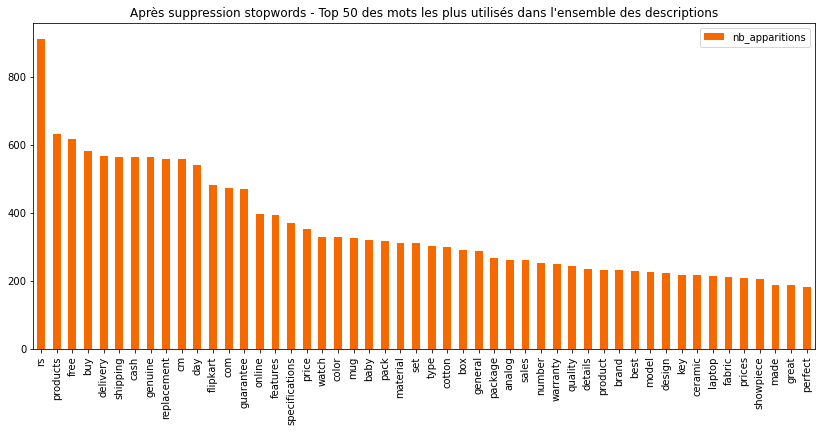

In [18]:
titre = 'Après suppression stopwords - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

Parmi les mots les plus utilisés, il reste des mots qui n'apportent pas d'information utile pour catégoriser le produit. Cela concerne :
- rs (unité de prix)
- products
- free
- buy
- delivery
- shipping
- cash
- genuine
- replacement
- cm
- day
- flipkart (provient du nom du site flipkart.com)
- com (provient du nom du site flipkart.com)
- guarantee
- online
- price
- model
- x (qui est utilisé pour les dimensions comme 24x24 cm)
- features
- specifications
- general
- package
- set
- pack

In [19]:
mots_sans_info = ['rs', 'products', 'free', 'buy', 'delivery', 'shipping', 'cash', 'genuine', 'replacement', 'cm',
                  'day', 'flipkart', 'com', 'guarantee', 'online', 'price', 'model', 'x', 'features', 'specifications',
                  'general', 'package', 'set', 'pack']

In [20]:
# suppression des mots ci-dessus des descriptions sans stopword
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_sans_stopword"] = [mot for mot in description_sans_stopword 
                                                                          if mot not in mots_sans_info]

In [21]:
liste_mots = recuperer_ensemble_mots(descriptions['description_sans_stopword'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

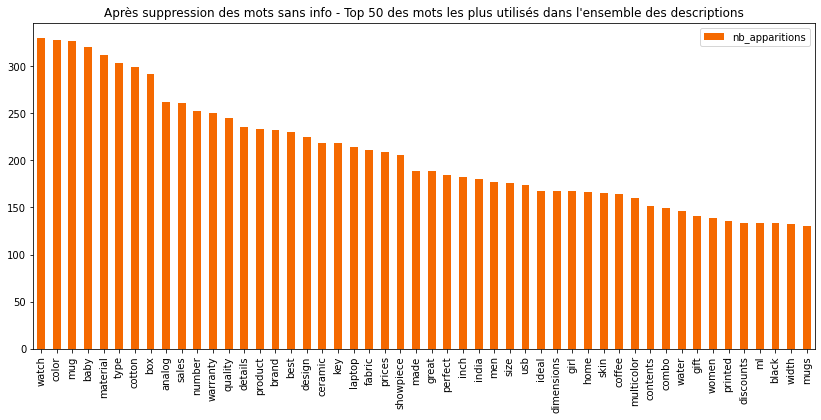

In [22]:
titre = 'Après suppression des mots sans info - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

On supprime également les mots suivants :
- prices
- india
- inch
- ml

In [23]:
mots_sans_info += ['prices', 'india', 'inch', 'ml']

In [24]:
# suppression des mots ci-dessus des descriptions sans stopword
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_sans_stopword"] = [mot for mot in description_sans_stopword 
                                                                          if mot not in mots_sans_info]

In [25]:
liste_mots = recuperer_ensemble_mots(descriptions['description_sans_stopword'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

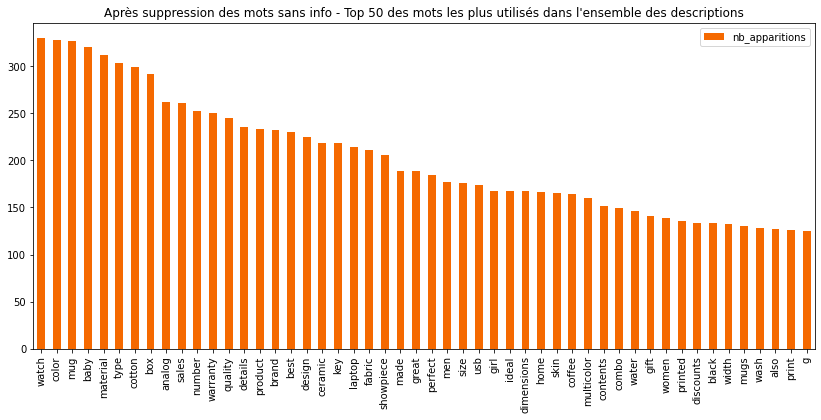

In [26]:
titre = 'Après suppression des mots sans info - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

## Lemmatisation et stemming

In [28]:
# Instanciation de l'objet qui lemmatisera mes descriptions
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet') # une fois installé, affiche un warning
lemmatizer = WordNetLemmatizer()

In [29]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, elegance, polyester, multicolor, abstrac..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[sathiyas, cotton, bath, towel, bath, towel, r..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, eurospa, cotton, terry, face, towel, siz..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, santosh, royal, fashion, cotton, printed..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, jaipur, print, cotton, floral, king, siz..."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, b..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [30]:
# On lemmatise chacune des descriptions sans stopword
descriptions["description_lemmatisee"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_lemmatisee"] = [lemmatizer.lemmatize(mot) for mot in description_sans_stopword]

In [31]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, elegance, polyester, multicolor, abstrac...","[key, elegance, polyester, multicolor, abstrac..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[sathiyas, cotton, bath, towel, bath, towel, r...","[sathiyas, cotton, bath, towel, bath, towel, r..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, eurospa, cotton, terry, face, towel, siz...","[key, eurospa, cotton, terry, face, towel, siz..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, santosh, royal, fashion, cotton, printed...","[key, santosh, royal, fashion, cotton, printed..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, jaipur, print, cotton, floral, king, siz...","[key, jaipur, print, cotton, floral, king, siz..."
...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, b...","[wallmantra, large, vinyl, sticker, sticker, b..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


La lemmatisation ne réduit que les noms sous leur forme canonique car la méthode ne fonctionne qu'avec un seul type de mot. Cette technique n'est pas forcément la plus appropriée pour l'anglais car les adjectifs sont invariables.

In [32]:
# On lemmatise sur les verbes chacune des descriptions sans stopword
descriptions["description_lemmatisee_verbe"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_lemmatisee_verbe"] = [lemmatizer.lemmatize(mot, 'v') 
                                                                     for mot in description_sans_stopword]

In [33]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, elegance, polyester, multicolor, abstrac...","[key, elegance, polyester, multicolor, abstrac...","[key, elegance, polyester, multicolor, abstrac..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[sathiyas, cotton, bath, towel, bath, towel, r...","[sathiyas, cotton, bath, towel, bath, towel, r...","[sathiyas, cotton, bath, towel, bath, towel, r..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, eurospa, cotton, terry, face, towel, siz...","[key, eurospa, cotton, terry, face, towel, siz...","[key, eurospa, cotton, terry, face, towel, siz..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, santosh, royal, fashion, cotton, printed...","[key, santosh, royal, fashion, cotton, printed...","[key, santosh, royal, fashion, cotton, print, ..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, jaipur, print, cotton, floral, king, siz...","[key, jaipur, print, cotton, floral, king, siz...","[key, jaipur, print, cotton, floral, king, siz..."
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, b...","[wallmantra, large, vinyl, sticker, sticker, b...","[wallmantra, large, vinyl, sticker, sticker, b..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [34]:
# Instanciation de l'objet qui ne conservera que les racines des descriptions
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [35]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, elegance, polyester, multicolor, abstrac...","[key, elegance, polyester, multicolor, abstrac...","[key, elegance, polyester, multicolor, abstrac..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[sathiyas, cotton, bath, towel, bath, towel, r...","[sathiyas, cotton, bath, towel, bath, towel, r...","[sathiyas, cotton, bath, towel, bath, towel, r..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, eurospa, cotton, terry, face, towel, siz...","[key, eurospa, cotton, terry, face, towel, siz...","[key, eurospa, cotton, terry, face, towel, siz..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, santosh, royal, fashion, cotton, printed...","[key, santosh, royal, fashion, cotton, printed...","[key, santosh, royal, fashion, cotton, print, ..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, jaipur, print, cotton, floral, king, siz...","[key, jaipur, print, cotton, floral, king, siz...","[key, jaipur, print, cotton, floral, king, siz..."
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, b...","[wallmantra, large, vinyl, sticker, sticker, b...","[wallmantra, large, vinyl, sticker, sticker, b..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [36]:
# On ne garde que les racines des mots de chacune des descriptions sans stopword
descriptions["description_stemmee"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_stemmee"] = [stemmer.stem(mot) for mot in description_sans_stopword]

In [37]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe,description_stemmee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, elegance, polyester, multicolor, abstrac...","[key, elegance, polyester, multicolor, abstrac...","[key, elegance, polyester, multicolor, abstrac...","[key, eleg, polyest, multicolor, abstract, eye..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[sathiyas, cotton, bath, towel, bath, towel, r...","[sathiyas, cotton, bath, towel, bath, towel, r...","[sathiyas, cotton, bath, towel, bath, towel, r...","[sathiya, cotton, bath, towel, bath, towel, re..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, eurospa, cotton, terry, face, towel, siz...","[key, eurospa, cotton, terry, face, towel, siz...","[key, eurospa, cotton, terry, face, towel, siz...","[key, eurospa, cotton, terri, face, towel, siz..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, santosh, royal, fashion, cotton, printed...","[key, santosh, royal, fashion, cotton, printed...","[key, santosh, royal, fashion, cotton, print, ...","[key, santosh, royal, fashion, cotton, print, ..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, jaipur, print, cotton, floral, king, siz...","[key, jaipur, print, cotton, floral, king, siz...","[key, jaipur, print, cotton, floral, king, siz...","[key, jaipur, print, cotton, floral, king, siz..."
...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empow, extra, larg, self, adhes, sticke..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, b...","[wallmantra, large, vinyl, sticker, sticker, b...","[wallmantra, large, vinyl, sticker, sticker, b...","[wallmantra, larg, vinyl, sticker, sticker, br..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f...","[uberlyf, extra, larg, pigment, polyvinyl, fil..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


# Construction de features

## Bag-of-words 1-gram

### Avec la lemmatisation

In [38]:
# Préparation du dataset
bag_of_words_lemme = descriptions[["uniq_id", "description", "description_lemmatisee_verbe"]].copy()

# Renommage de la colonne description car le mot existe et une autre variable est créée avec le bag of words
bag_of_words_lemme.rename(columns={"description": "full_description"}, inplace=True)

In [39]:
# Conversion des descriptions lemmatisées sous forme de liste vers un string
for index_ligne, ligne in bag_of_words_lemme.iterrows():
    description_lemmatisee_liste = ligne["description_lemmatisee_verbe"]
    bag_of_words_lemme.loc[index_ligne, "description_lemmatisee_txt"] = ' '.join(description_lemmatisee_liste)

In [40]:
liste_descriptions_lemmatisees = bag_of_words_lemme["description_lemmatisee_txt"].to_list()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv_lemme = CountVectorizer() #to take max features(columns), 2500
x = cv_lemme.fit_transform(liste_descriptions_lemmatisees).toarray()
liste_vocabulaire = cv_lemme.get_feature_names()
bag_of_words = pd.DataFrame(data=x, columns=liste_vocabulaire)
bag_of_words_lemme = pd.concat([bag_of_words_lemme, bag_of_words], axis=1)

Le CountVectorizer ne compte pas les mots d'une lettre, ces "mots" ne font donc pas partie du bag of words. Environ 25% des descriptions contiennent ce type de mots, quelques-unes d'entre elles ont 28 mots d'une lettre dans leur description. 

In [42]:
bag_of_words_lemme

,uniq_id,full_description,description_lemmatisee_verbe,description_lemmatisee_txt,aa,aaa,aapno,aari,aarika,abide,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, elegance, polyester, multicolor, abstrac...",key elegance polyester multicolor abstract eye...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[sathiyas, cotton, bath, towel, bath, towel, r...",sathiyas cotton bath towel bath towel red yell...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, eurospa, cotton, terry, face, towel, siz...",key eurospa cotton terry face towel size small...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, santosh, royal, fashion, cotton, print, ...",key santosh royal fashion cotton print king si...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, jaipur, print, cotton, floral, king, siz...",key jaipur print cotton floral king size doubl...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...",oren empower extra large self adhesive sticker...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, b...",wallmantra large vinyl sticker sticker bring h...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[uberlyfe, extra, large, pigment, polyvinyl, f...",uberlyfe extra large pigment polyvinyl film im...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[wallmantra, medium, vinyl, sticker, sticker, ...",wallmantra medium vinyl sticker sticker wallma...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Avec le stemming

In [43]:
# Préparation du dataset
bag_of_words_stem = descriptions[["uniq_id", "description", "description_stemmee"]].copy()

# Renommage de la colonne description car le mot existe et une autre variable est créée avec le bag of words
bag_of_words_stem.rename(columns={"description": "full_description"}, inplace=True)

In [44]:
# Conversion des descriptions stemmées sous forme de liste vers un string
for index_ligne, ligne in bag_of_words_stem.iterrows():
    description_stemmee_liste = ligne["description_stemmee"]
    bag_of_words_stem.loc[index_ligne, "description_stemmee_txt"] = ' '.join(description_stemmee_liste)

In [45]:
liste_descriptions_stemmees = bag_of_words_stem["description_stemmee_txt"].to_list()

In [46]:
# Comptabilisation des mots de chacune des descriptions et création des features
cv_stem = CountVectorizer()
x = cv_stem.fit_transform(liste_descriptions_stemmees).toarray()
liste_vocabulaire = cv_stem.get_feature_names()
bag_of_words = pd.DataFrame(data=x, columns=liste_vocabulaire)
bag_of_words_stem = pd.concat([bag_of_words_stem, bag_of_words], axis=1)

In [47]:
description_stemmee = bag_of_words_stem["description_stemmee"].copy()
verif = pd.DataFrame(data=description_stemmee, columns=["description_stemmee"])

In [48]:
for index_ligne, ligne in verif.iterrows():
    verif.loc[index_ligne, "nb_mots_description_stemmee"] = len(verif["description_stemmee"][index_ligne])

In [49]:
verif["nb_mots_description_bow"] = bag_of_words_stem[liste_vocabulaire].sum(axis=1)

In [50]:
verif

,description_stemmee,nb_mots_description_stemmee,nb_mots_description_bow
0,"[key, eleg, polyest, multicolor, abstract, eye...",135.0,135
1,"[sathiya, cotton, bath, towel, bath, towel, re...",53.0,53
2,"[key, eurospa, cotton, terri, face, towel, siz...",132.0,131
3,"[key, santosh, royal, fashion, cotton, print, ...",95.0,95
4,"[key, jaipur, print, cotton, floral, king, siz...",132.0,131
...,...,...,...
1045,"[oren, empow, extra, larg, self, adhes, sticke...",221.0,219
1046,"[wallmantra, larg, vinyl, sticker, sticker, br...",145.0,145
1047,"[uberlyf, extra, larg, pigment, polyvinyl, fil...",17.0,17
1048,"[wallmantra, medium, vinyl, sticker, sticker, ...",11.0,11


In [51]:
verif["description_stemmee"][1045]

['oren',
 'empow',
 'extra',
 'larg',
 'self',
 'adhes',
 'sticker',
 'doubl',
 'sticker',
 'use',
 'big',
 'wall',
 'two',
 'piec',
 'arrang',
 'altern',
 'reflect',
 'cor',
 'wall',
 'like',
 'look',
 'tree',
 'green',
 'shade',
 'leav',
 'give',
 'sharp',
 'featur',
 'greeneri',
 'reusabl',
 'e',
 'use',
 'appli',
 'simpl',
 'remov',
 'use',
 'sticker',
 'anoth',
 'wall',
 'differ',
 'idea',
 'instal',
 'surfac',
 'wish',
 'attach',
 'decal',
 'must',
 'clean',
 'dust',
 'greas',
 'contamin',
 'simpli',
 'peel',
 'pre',
 'cut',
 'piec',
 'wall',
 'sticker',
 'back',
 'paper',
 'appli',
 'desir',
 'area',
 'note',
 'freshli',
 'paint',
 'lacquer',
 'surfac',
 'must',
 'allow',
 'complet',
 'cure',
 'decal',
 'appli',
 'recommend',
 'wait',
 'minimum',
 'week',
 'discourag',
 'instal',
 'certain',
 'surfac',
 'brick',
 'stucco',
 'concret',
 'block',
 'sued',
 'paint',
 'sand',
 'paint',
 'appli',
 'wet',
 'wall',
 'press',
 'firmli',
 'squeez',
 'air',
 'bubbl',
 'note',
 'help',
 'f

## Bag-of-words 2-gram

### Avec la lemmatisation

In [52]:
# Préparation du dataset
bag_of_words_lemme_2gram = bag_of_words_lemme[["uniq_id", "full_description", 
                                               "description_lemmatisee_verbe", "description_lemmatisee_txt"]].copy()

In [53]:
# Liste de l'ensemble des descriptions
liste_descriptions_lemmatisees = bag_of_words_lemme["description_lemmatisee_txt"].to_list()

In [54]:
# Comptabilisation des mots de chacune des descriptions et création des features
cv_lemme_2gram = CountVectorizer(ngram_range=(2, 2)) #to take max features(columns), 2500
x = cv_lemme_2gram.fit_transform(liste_descriptions_lemmatisees).toarray()
liste_vocabulaire = cv_lemme_2gram.get_feature_names()
bag_of_words = pd.DataFrame(data=x, columns=liste_vocabulaire)
bag_of_words_lemme_2gram = pd.concat([bag_of_words_lemme_2gram, bag_of_words], axis=1)

In [55]:
bag_of_words_lemme_2gram

,uniq_id,full_description,description_lemmatisee_verbe,description_lemmatisee_txt,aa batteries,aa pencil,aaa battery,aapno rajasthan,aari embroider,aari embroidery,...,zipper brand,zipper compartment,zone pillow,zone print,zone uv,zoom type,zora laptop,zyxel data,zyxel pla,zyxel vmg
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, elegance, polyester, multicolor, abstrac...",key elegance polyester multicolor abstract eye...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[sathiyas, cotton, bath, towel, bath, towel, r...",sathiyas cotton bath towel bath towel red yell...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, eurospa, cotton, terry, face, towel, siz...",key eurospa cotton terry face towel size small...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, santosh, royal, fashion, cotton, print, ...",key santosh royal fashion cotton print king si...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, jaipur, print, cotton, floral, king, siz...",key jaipur print cotton floral king size doubl...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...",oren empower extra large self adhesive sticker...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, b...",wallmantra large vinyl sticker sticker bring h...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[uberlyfe, extra, large, pigment, polyvinyl, f...",uberlyfe extra large pigment polyvinyl film im...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[wallmantra, medium, vinyl, sticker, sticker, ...",wallmantra medium vinyl sticker sticker wallma...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Avec le stemming

In [56]:
# Préparation du dataset
bag_of_words_stem_2gram = bag_of_words_stem[["uniq_id", "full_description", 
                                             "description_stemmee", "description_stemmee_txt"]].copy()

In [57]:
# Liste de l'ensemble des descriptions
liste_descriptions_stemmees = bag_of_words_stem["description_stemmee_txt"].to_list()

In [58]:
# Comptabilisation des mots de chacune des descriptions et création des features
cv_stem_2gram = CountVectorizer(ngram_range=(2, 2)) #to take max features(columns), 2500
x = cv_stem_2gram.fit_transform(liste_descriptions_stemmees).toarray()
liste_vocabulaire = cv_stem_2gram.get_feature_names()
bag_of_words = pd.DataFrame(data=x, columns=liste_vocabulaire)
bag_of_words_stem_2gram = pd.concat([bag_of_words_stem_2gram, bag_of_words], axis=1)

In [59]:
len(liste_vocabulaire)

17082

In [60]:
bag_of_words_stem_2gram

,uniq_id,full_description,description_stemmee,description_stemmee_txt,aa batteri,aa pencil,aaa batteri,aapno rajasthan,aari embroid,aari embroideri,...,zipper brand,zipper compart,zone pillow,zone print,zone uv,zoom type,zora laptop,zyxel data,zyxel pla,zyxel vmg
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, eleg, polyest, multicolor, abstract, eye...",key eleg polyest multicolor abstract eyelet do...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[sathiya, cotton, bath, towel, bath, towel, re...",sathiya cotton bath towel bath towel red yello...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, eurospa, cotton, terri, face, towel, siz...",key eurospa cotton terri face towel size small...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, santosh, royal, fashion, cotton, print, ...",key santosh royal fashion cotton print king si...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, jaipur, print, cotton, floral, king, siz...",key jaipur print cotton floral king size doubl...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empow, extra, larg, self, adhes, sticke...",oren empow extra larg self adhes sticker doubl...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, larg, vinyl, sticker, sticker, br...",wallmantra larg vinyl sticker sticker bring ho...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[uberlyf, extra, larg, pigment, polyvinyl, fil...",uberlyf extra larg pigment polyvinyl film impo...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[wallmantra, medium, vinyl, sticker, sticker, ...",wallmantra medium vinyl sticker sticker wallma...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF/IDF

### Avec la lemmatisation

In [61]:
# Préparation du dataset
tf_idf_lemme = bag_of_words_lemme[["uniq_id", "full_description", 
                                   "description_lemmatisee_verbe", "description_lemmatisee_txt"]].copy()

In [62]:
# Liste de l'ensemble des descriptions
liste_descriptions_lemmatisees = tf_idf_lemme["description_lemmatisee_txt"].to_list()

In [63]:
# Comptabilisation des mots de chacune des descriptions et création des features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() #to take max features(columns), 2500
x = vectorizer.fit_transform(liste_descriptions_lemmatisees).toarray()
liste_vocabulaire = vectorizer.get_feature_names()
tf_idf = pd.DataFrame(data=x, columns=liste_vocabulaire)
tf_idf_lemme = pd.concat([tf_idf_lemme, tf_idf], axis=1)

In [64]:
len(liste_vocabulaire)

4464

In [65]:
tf_idf_lemme.describe()

,aa,aaa,aapno,aari,aarika,abide,abilities,ability,abkl,able,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,...,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.000190,0.000091,0.001214,0.000343,0.000118,0.000342,0.000059,0.000225,0.000578,0.000690,...,0.000547,0.000185,0.000143,0.000032,0.000072,0.000183,0.000668,0.000071,0.000333,0.001507
std,0.004367,0.002936,0.023282,0.011108,0.003809,0.008012,0.001922,0.007293,0.010812,0.011237,...,0.017714,0.005985,0.004625,0.001024,0.002333,0.003654,0.015431,0.002312,0.010792,0.029287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.109423,0.095137,0.559036,0.359932,0.123414,0.218843,0.062290,0.236330,0.210070,0.194132,...,0.573996,0.193943,0.149865,0.033166,0.075601,0.086105,0.397193,0.074933,0.349698,0.670840


### Avec le stemming

In [66]:
# Préparation du dataset
tf_idf_stem = bag_of_words_stem[["uniq_id", "full_description", 
                                 "description_stemmee", "description_stemmee_txt"]].copy()

In [67]:
# Liste de l'ensemble des descriptions
liste_descriptions_stemmees = tf_idf_stem["description_stemmee_txt"].to_list()

In [68]:
# Comptabilisation des mots de chacune des descriptions et création des features
vectorizer_stem = TfidfVectorizer()
x = vectorizer_stem.fit_transform(liste_descriptions_stemmees).toarray()
liste_vocabulaire = vectorizer_stem.get_feature_names()
tf_idf = pd.DataFrame(data=x, columns=liste_vocabulaire)
tf_idf_stem = pd.concat([tf_idf_stem, tf_idf], axis=1)

In [69]:
len(liste_vocabulaire)

4070

In [70]:
tf_idf_stem

,uniq_id,full_description,description_stemmee,description_stemmee_txt,aa,aaa,aapno,aari,aarika,abil,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, eleg, polyest, multicolor, abstract, eye...",key eleg polyest multicolor abstract eyelet do...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[sathiya, cotton, bath, towel, bath, towel, re...",sathiya cotton bath towel bath towel red yello...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, eurospa, cotton, terri, face, towel, siz...",key eurospa cotton terri face towel size small...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, santosh, royal, fashion, cotton, print, ...",key santosh royal fashion cotton print king si...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, jaipur, print, cotton, floral, king, siz...",key jaipur print cotton floral king size doubl...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empow, extra, larg, self, adhes, sticke...",oren empow extra larg self adhes sticker doubl...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, larg, vinyl, sticker, sticker, br...",wallmantra larg vinyl sticker sticker bring ho...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[uberlyf, extra, larg, pigment, polyvinyl, fil...",uberlyf extra larg pigment polyvinyl film impo...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[wallmantra, medium, vinyl, sticker, sticker, ...",wallmantra medium vinyl sticker sticker wallma...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
tf_idf_stem.describe()

,aa,aaa,aapno,aari,aarika,abil,abkl,abl,abod,abras,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,...,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.000190,0.000089,0.001219,0.000344,0.000118,0.000269,0.000580,0.000694,0.000343,0.000032,...,0.000547,0.000181,0.000143,0.000032,0.000073,0.000179,0.000677,0.000072,0.000328,0.001507
std,0.004379,0.002887,0.023367,0.011150,0.003815,0.007192,0.010857,0.011318,0.008068,0.001027,...,0.017714,0.005869,0.004639,0.001027,0.002364,0.003574,0.015622,0.002319,0.010624,0.029287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.111128,0.093548,0.559473,0.361294,0.123618,0.226144,0.211010,0.196345,0.221522,0.033273,...,0.573996,0.190169,0.150311,0.033273,0.076618,0.079916,0.399933,0.075155,0.344270,0.670840


# Modélisations

## Non supervisée

### LDA & LDA visualisation

#### Etude du nombre de catégories et création de features avec les catégories

In [3]:
produits_data["category"] = ""
produits_data["subcategory"] = ""
for index_ligne, ligne in produits_data.iterrows():
    category = ligne["product_category_tree"].split(">>")[0].replace("[\"", "")[:-1]
    subcategory = ligne["product_category_tree"].split(">>")[1].replace("[\"", "")[1:-1]
    produits_data.loc[index_ligne, "category"] = category
    produits_data.loc[index_ligne, "subcategory"] = subcategory

In [4]:
produits_data.category.value_counts()

Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Watches                       150
Kitchen & Dining              150
Home Furnishing               150
Name: category, dtype: int64

In [5]:
produits_data.subcategory.value_counts()[:15]

Wrist Watches                149
Laptop Accessories            87
Infant Wear                   84
Coffee Mugs                   74
Showpieces                    71
Bed Linen                     65
Fragrances                    65
Network Components            49
Table Decor & Handicrafts     27
Cookware                      27
Combos and Kits               24
Wall Decor & Clocks           22
Bath Linen                    21
Curtains & Accessories        19
Makeup                        18
Name: subcategory, dtype: int64

In [75]:
produits_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,subcategory
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[

Je travaillerai sur les catégories car les sous-catégories me paraissent trop nombreuses et détaillées pour commencer la modélisation.

#### Avec le bag-of-words 1-gram

##### Sur la lemmatisation

In [76]:
from sklearn.decomposition import LatentDirichletAllocation

nb_categories = 7
bag_of_words = bag_of_words_lemme.iloc[:, 4:] # on enlève les infos des descriptions
lda_bow_lemme = LatentDirichletAllocation(n_components=nb_categories,
                                          learning_method='online', # me paraît plus pertinent au vu du nombre de features
                                          random_state=0)
lda_bow_lemme.fit(bag_of_words)

LatentDirichletAllocation(learning_method='online', n_components=7,
                          random_state=0)

In [77]:
# affichage manuel des mots les plus représentés dans chacune des catégories
def afficher_categories(modele, noms_features, nb_top_mots):
    for categorie_id, categorie in enumerate(modele.components_):
        print("Catégorie {}:".format(categorie_id))
        print(" ".join([noms_features[i] for i in categorie.argsort()[:-nb_top_mots - 1:-1]]))

nb_top_mots = 10
afficher_categories(lda_bow_lemme, bag_of_words.columns.to_list(), nb_top_mots)

Catégorie 0:
dohar dark cell hp dv pavilion bag oil bluetooth battery
Catégorie 1:
watch analog men great discount women dial strap water bowl
Catégorie 2:
baby cotton color box sales number fabric wall design print
Catégorie 3:
combo oil best kadhai face soap cream kit beauty care
Catégorie 4:
showpiece best towel paper bath bottle green quilt light brass
Catégorie 5:
mug design ceramic gift make perfect coffee eyelet material love
Catégorie 6:
laptop skin warranty shape print pad usb mouse multicolor quality


In [235]:
# Installation via le terminal de pyLDAvis
#!pip install pyldavis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=f129d1489f6c8833402c342b8956229b8efaad6747e7c80214714ebe83780b78
  Stored in directory: c:\users\sbourgeois\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=79b805572720b5e655bf88935a774e657d981a94033037d8e94198cb5e05ef2a
  Stored in directory: c:\users\sbourgeois\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Su

In [78]:
# affichage automatique des catégories
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
import numpy as np
pyLDAvis.enable_notebook()
bag_of_words = np.matrix(bag_of_words)
pyLDAvis.sklearn.prepare(lda_bow_lemme, bag_of_words, cv_lemme)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.174445 -0.036354       1        1  33.315941
5     -0.155313 -0.197808       2        1  18.982119
6     -0.176490  0.243926       3        1  18.142413
1      0.179454 -0.015248       4        1  10.717594
4      0.059963 -0.126421       5        1   9.184409
3      0.120383  0.115617       6        1   7.295555
0      0.146448  0.016288       7        1   2.361970, topic_info=         Term        Freq       Total Category  logprob  loglift
2576      mug  390.000000  390.000000  Default  30.0000  30.0000
4315    watch  277.000000  277.000000  Default  29.0000  29.0000
2201   laptop  306.000000  306.000000  Default  28.0000  28.0000
130    analog  206.000000  206.000000  Default  27.0000  27.0000
3610     skin  287.000000  287.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
336   battery    5.467828   78.421371   Topic7  -5.2549   1.0825
3555     shop    3.735757   15.780999   Topic7  -5.6358   2.3048
1825     help    4.236039   38.331548   Topic7  -5.5101   1.5430
2831    paris    3.441839   13.588677   Topic7  -5.7177   2.3724
1901     huge    3.191071   25.058080   Topic7  -5.7934   1.6848

[416 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
30        7  0.677674        ache
42        3  0.991383     adapter
44        5  0.943348     adaptor
48        1  0.973420  additional
48        6  0.014749  additional
...     ...       ...         ...
4435      3  0.082556         yes
4435      5  0.123834         yes
4435      6  0.134153         yes
4436      2  0.992090         yet
4443      4  0.972434          ym

[713 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 7, 2, 5, 4, 1])

Visualisation des catégories avec le TSNE de pyLDAvis

In [79]:
bag_of_words = np.matrix(bag_of_words)
pyLDAvis.sklearn.prepare(lda_bow_lemme, bag_of_words, cv_lemme, mds='tsne')

C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2     -29.594002  60.112713       1        1  33.315941
5     -45.996586  11.891685       2        1  18.982119
6      20.368856  70.019325       3        1  18.142413
1      53.928768  31.704309       4        1  10.717594
4     -12.437127 -26.423267       5        1   9.184409
3       3.965971  21.797720       6        1   7.295555
0      37.524284 -16.517805       7        1   2.361970, topic_info=         Term        Freq       Total Category  logprob  loglift
2576      mug  390.000000  390.000000  Default  30.0000  30.0000
4315    watch  277.000000  277.000000  Default  29.0000  29.0000
2201   laptop  306.000000  306.000000  Default  28.0000  28.0000
130    analog  206.000000  206.000000  Default  27.0000  27.0000
3610     skin  287.000000  287.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
336   battery    5.467828   78.421371   Topic7  -5.2549   1.0825
3555     shop    3.735757   15.780999   Topic7  -5.6358   2.3048
1825     help    4.236039   38.331548   Topic7  -5.5101   1.5430
2831    paris    3.441839   13.588677   Topic7  -5.7177   2.3724
1901     huge    3.191071   25.058080   Topic7  -5.7934   1.6848

[416 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
30        7  0.677674        ache
42        3  0.991383     adapter
44        5  0.943348     adaptor
48        1  0.973420  additional
48        6  0.014749  additional
...     ...       ...         ...
4435      3  0.082556         yes
4435      5  0.123834         yes
4435      6  0.134153         yes
4436      2  0.992090         yet
4443      4  0.972434          ym

[713 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 7, 2, 5, 4, 1])

Visualisation des catégories avec le TSNE

In [80]:
lda_bow_lemme.components_

array([[0.1439553 , 0.14380103, 0.14396888, ..., 0.14377018, 0.14375554,
        0.14361843],
       [0.14419981, 0.14382316, 0.14433068, ..., 0.14373187, 0.14370096,
        0.14386406],
       [0.14374838, 0.14372275, 6.94900795, ..., 0.14396001, 0.14718345,
        0.14364617],
       ...,
       [0.14464953, 0.14382567, 0.17381531, ..., 0.14424587, 0.14380725,
        0.97920469],
       [0.14386297, 0.14359935, 0.1442041 , ..., 0.14384525, 0.14367069,
        0.14373187],
       [2.97211525, 1.00548626, 0.14392992, ..., 0.1539691 , 4.22392299,
        0.1437794 ]])

##### Sur le stemming

In [81]:
nb_categories = 7
bag_of_words = bag_of_words_stem.iloc[:, 4:] # on enlève les infos des descriptions
lda_bow_stem = LatentDirichletAllocation(n_components=nb_categories,
                                          learning_method='online', # me paraît plus pertinent au vu du nombre de features
                                          random_state=0)
lda_bow_stem.fit(bag_of_words)

LatentDirichletAllocation(learning_method='online', n_components=7,
                          random_state=0)

In [82]:
bag_of_words = np.matrix(bag_of_words)
pyLDAvis.sklearn.prepare(lda_bow_stem, bag_of_words, cv_stem)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.085555 -0.102990       1        1  20.182784
1     -0.221013  0.012357       2        1  18.207478
5     -0.018040 -0.103032       3        1  17.745795
0      0.207845 -0.162667       4        1  14.231360
4     -0.125586  0.125578       5        1  13.802968
3      0.059416  0.004623       6        1   9.824444
2      0.182933  0.226130       7        1   6.005171, topic_info=        Term        Freq       Total Category  logprob  loglift
1983  laptop  357.000000  357.000000  Default  30.0000  30.0000
2332     mug  354.000000  354.000000  Default  29.0000  29.0000
255     babi  284.000000  284.000000  Default  28.0000  28.0000
3928   watch  242.000000  242.000000  Default  27.0000  27.0000
802   cotton  265.000000  265.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
548     care   16.908966  102.910146   Topic7  -5.0590   1.0065
3812     use   18.601040  213.968228   Topic7  -4.9637   0.3699
3771    type   18.181681  325.251259   Topic7  -4.9865  -0.0716
2469     oil   12.456612   40.185747   Topic7  -5.3646   1.6413
1247     eye   12.441310   30.505560   Topic7  -5.3658   1.9157

[420 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
13        2  0.985531  abstract
31        5  0.900694     acryl
37        3  0.010997     adapt
37        4  0.978692     adapt
43        3  0.974189     adhes
...     ...       ...       ...
3997      7  0.020100     women
4001      3  0.191891    wooden
4001      5  0.794978    wooden
4043      2  0.992688       yet
4050      4  0.968965        ym

[743 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 6, 1, 5, 4, 3])

#### Avec le bag-of-words 2-gram

##### Sur la lemmatisation

In [83]:
nb_categories = 7
bag_of_words = bag_of_words_lemme_2gram.iloc[:, 4:] # on enlève les infos des descriptions
lda_bow_2gram_lemme = LatentDirichletAllocation(n_components=nb_categories,
                                                learning_method='online', # me paraît plus pertinent au vu du nombre de features
                                                random_state=0)
lda_bow_2gram_lemme.fit(bag_of_words)

LatentDirichletAllocation(learning_method='online', n_components=7,
                          random_state=0)

In [84]:
bag_of_words = np.matrix(bag_of_words)
pyLDAvis.sklearn.prepare(lda_bow_2gram_lemme, bag_of_words, cv_lemme_2gram)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.068606 -0.249657       1        1  19.513598
5      0.065598  0.137799       2        1  17.459038
6     -0.289340 -0.011047       3        1  14.649470
1      0.048679  0.030581       4        1  14.079359
4      0.051507  0.010970       5        1  13.105949
2      0.014308  0.017755       6        1  11.053871
0      0.040641  0.063599       7        1  10.138716, topic_info=                 Term        Freq       Total Category  logprob  loglift
8654      laptop skin  133.000000  133.000000  Default  30.0000  30.0000
12075     print shape  112.000000  112.000000  Default  29.0000  29.0000
829         baby girl  109.000000  109.000000  Default  28.0000  28.0000
14020      skin mouse   91.000000   91.000000  Default  27.0000  27.0000
10035       mouse pad   91.000000   91.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
8736       lead light    9.375817   30.149590   Topic7  -6.1485   1.1208
6899   great discount   11.894708   76.006572   Topic7  -5.9105   0.4341
11529    pizza cutter    7.698488   23.288854   Topic7  -6.3456   1.1819
4701    digital watch    7.408441   20.724351   Topic7  -6.3840   1.2601
7364     high quality    8.337989   65.819303   Topic7  -6.2658   0.2227

[313 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
46         1  0.964168            ac color
137        5  0.939292         add kitchen
159        1  0.977972   additional detail
217        5  0.939306  adorable fantastic
342        2  0.957443           also pass
...      ...       ...                 ...
16741      6  0.133477         width depth
16829      3  0.961712       without leave
16874      6  0.912376        women maxima
17083      4  0.970150          years come
17173      4  0.970158           yet fresh

[393 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 7, 2, 5, 3, 1])

##### Sur le stemming

In [85]:
nb_categories = 7
bag_of_words = bag_of_words_stem_2gram.iloc[:, 4:] # on enlève les infos des descriptions
lda_bow_stem_2gram = LatentDirichletAllocation(n_components=nb_categories,
                                               learning_method='online', # me paraît plus pertinent au vu du nombre de features
                                               random_state=0)
lda_bow_stem_2gram.fit(bag_of_words)

LatentDirichletAllocation(learning_method='online', n_components=7,
                          random_state=0)

In [86]:
bag_of_words = np.matrix(bag_of_words)
pyLDAvis.sklearn.prepare(lda_bow_stem_2gram, bag_of_words, cv_stem_2gram)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.026111  0.172218       1        1  19.906698
0      0.279649 -0.068401       2        1  16.787714
1     -0.079734 -0.060190       3        1  13.864657
5      0.002094  0.129595       4        1  13.111574
4     -0.028580 -0.030862       5        1  12.860939
2     -0.111418 -0.166340       6        1  12.382521
3     -0.035900  0.023980       7        1  11.085898, topic_info=                  Term        Freq       Total Category  logprob  loglift
408       analog watch  152.000000  152.000000  Default  30.0000  30.0000
8579       laptop skin  133.000000  133.000000  Default  29.0000  29.0000
820          babi girl  127.000000  127.000000  Default  28.0000  28.0000
11966      print shape  112.000000  112.000000  Default  27.0000  27.0000
16318        watch men   87.000000   87.000000  Default  26.0000  26.0000
...                ...         ...         ...      ...      ...      ...
11067        parti wed    9.672281   12.269539   Topic7  -6.2067   1.9616
13626    showpiec best   17.372031   37.311384   Topic7  -5.6211   1.4351
9641           men boy    9.375865   12.715287   Topic7  -6.2378   1.8948
1764          boy girl   10.414276   18.994660   Topic7  -6.1328   1.5985
14351  stainless steel   10.950507   35.207310   Topic7  -6.0826   1.0316

[310 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
42         7  0.981758  abstract singl
46         4  0.957542        ac color
153        1  0.964583    addit detail
192        5  0.969566     adhes vinyl
230        6  0.975815      afford mug
...      ...       ...             ...
16603      1  0.163842    width height
16603      5  0.737289    width height
16632      4  0.967203  window curtain
16980      3  0.995612       year come
17031      3  0.995622       yet fresh

[383 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 2, 6, 5, 3, 4])

#### Avec le TF/IDF

##### Sur la lemmatisation

In [87]:
nb_categories = 7
tf_idf = tf_idf_lemme.iloc[:, 4:] # on enlève les infos des descriptions
lda_tf_idf_lemme = LatentDirichletAllocation(n_components=nb_categories,
                                             learning_method='online', # me paraît plus pertinent au vu du nombre de features
                                             random_state=0)
lda_tf_idf_lemme.fit(tf_idf)

LatentDirichletAllocation(learning_method='online', n_components=7,
                          random_state=0)

In [88]:
tf_idf = np.matrix(tf_idf)
pyLDAvis.sklearn.prepare(lda_tf_idf_lemme, tf_idf, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.169332 -0.023222       1        1  56.418050
1     -0.067038 -0.095899       2        1  11.736374
4     -0.020887  0.028760       3        1   7.567665
5     -0.011634  0.020429       4        1   7.211043
3     -0.026816  0.029580       5        1   5.855603
0     -0.024270  0.019873       6        1   5.666335
6     -0.018686  0.020480       7        1   5.544930, topic_info=          Term       Freq      Total Category  logprob  loglift
4315     watch  13.000000  13.000000  Default  30.0000  30.0000
130     analog  11.000000  11.000000  Default  29.0000  29.0000
2459       men   8.000000   8.000000  Default  28.0000  28.0000
2576       mug  13.000000  13.000000  Default  27.0000  27.0000
1119  discount   6.000000   6.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1340    ethnic   0.266596   0.785108   Topic7  -6.6733   1.8122
2201    laptop   1.065064  13.717137   Topic7  -5.2882   0.3367
789      combo   0.518165  10.090588   Topic7  -6.0087  -0.0768
899     cotton   0.440931  11.206104   Topic7  -6.1701  -0.3430
1899       hub   0.275749   1.458573   Topic7  -6.6395   1.2266

[317 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
17        1  1.007749  abstract
19        1  0.868600        ac
53        5  1.017961    adidas
101       5  1.139976  aloevera
130       2  0.961283    analog
...     ...       ...       ...
4391      2  0.734347     women
4429      5  0.983249   yardley
4434      1  0.706798    yellow
4442      2  0.811015        yl
4443      2  0.835122        ym

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 6, 4, 1, 7])

In [89]:
pyLDAvis.sklearn.prepare(lda_tf_idf_lemme, tf_idf, vectorizer, mds='mmds')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.044635 -0.166134       1        1  56.418050
1     -0.099857  0.061637       2        1  11.736374
4      0.055845  0.054796       3        1   7.567665
5      0.062645 -0.011736       4        1   7.211043
3      0.024990  0.008795       5        1   5.855603
0     -0.002373  0.003547       6        1   5.666335
6      0.003385  0.049094       7        1   5.544930, topic_info=          Term       Freq      Total Category  logprob  loglift
4315     watch  13.000000  13.000000  Default  30.0000  30.0000
130     analog  11.000000  11.000000  Default  29.0000  29.0000
2459       men   8.000000   8.000000  Default  28.0000  28.0000
2576       mug  13.000000  13.000000  Default  27.0000  27.0000
1119  discount   6.000000   6.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1340    ethnic   0.266596   0.785108   Topic7  -6.6733   1.8122
2201    laptop   1.065064  13.717137   Topic7  -5.2882   0.3367
789      combo   0.518165  10.090588   Topic7  -6.0087  -0.0768
899     cotton   0.440931  11.206104   Topic7  -6.1701  -0.3430
1899       hub   0.275749   1.458573   Topic7  -6.6395   1.2266

[317 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
17        1  1.007749  abstract
19        1  0.868600        ac
53        5  1.017961    adidas
101       5  1.139976  aloevera
130       2  0.961283    analog
...     ...       ...       ...
4391      2  0.734347     women
4429      5  0.983249   yardley
4434      1  0.706798    yellow
4442      2  0.811015        yl
4443      2  0.835122        ym

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 6, 4, 1, 7])

In [90]:
pyLDAvis.sklearn.prepare(lda_tf_idf_lemme, tf_idf, vectorizer, mds='tsne')

C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2     -29.594002  60.112713       1        1  56.418050
1     -45.996586  11.891685       2        1  11.736374
4      20.368856  70.019325       3        1   7.567665
5      53.928768  31.704309       4        1   7.211043
3     -12.437127 -26.423267       5        1   5.855603
0       3.965971  21.797720       6        1   5.666335
6      37.524284 -16.517805       7        1   5.544930, topic_info=          Term       Freq      Total Category  logprob  loglift
4315     watch  13.000000  13.000000  Default  30.0000  30.0000
130     analog  11.000000  11.000000  Default  29.0000  29.0000
2459       men   8.000000   8.000000  Default  28.0000  28.0000
2576       mug  13.000000  13.000000  Default  27.0000  27.0000
1119  discount   6.000000   6.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1340    ethnic   0.266596   0.785108   Topic7  -6.6733   1.8122
2201    laptop   1.065064  13.717137   Topic7  -5.2882   0.3367
789      combo   0.518165  10.090588   Topic7  -6.0087  -0.0768
899     cotton   0.440931  11.206104   Topic7  -6.1701  -0.3430
1899       hub   0.275749   1.458573   Topic7  -6.6395   1.2266

[317 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
17        1  1.007749  abstract
19        1  0.868600        ac
53        5  1.017961    adidas
101       5  1.139976  aloevera
130       2  0.961283    analog
...     ...       ...       ...
4391      2  0.734347     women
4429      5  0.983249   yardley
4434      1  0.706798    yellow
4442      2  0.811015        yl
4443      2  0.835122        ym

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 6, 4, 1, 7])

##### Sur le stemming

In [91]:
nb_categories = 7
tf_idf = tf_idf_stem.iloc[:, 4:] # on enlève les infos des descriptions
lda_tf_idf_stem = LatentDirichletAllocation(n_components=nb_categories,
                                             learning_method='online', # me paraît plus pertinent au vu du nombre de features
                                             random_state=0)
lda_tf_idf_stem.fit(tf_idf)

LatentDirichletAllocation(learning_method='online', n_components=7,
                          random_state=0)

In [92]:
tf_idf = np.matrix(tf_idf)
pyLDAvis.sklearn.prepare(lda_tf_idf_stem, tf_idf, vectorizer_stem)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.159195 -0.069239       1        1  46.156634
5     -0.104660 -0.124381       2        1  25.406051
4     -0.012356  0.065753       3        1   8.777430
3     -0.005974  0.043769       4        1   5.769593
2     -0.019462  0.019601       5        1   4.885063
6     -0.008800  0.032121       6        1   4.618023
0     -0.007943  0.032377       7        1   4.387206, topic_info=          Term       Freq      Total Category  logprob  loglift
3928     watch  14.000000  14.000000  Default  30.0000  30.0000
1983    laptop  13.000000  13.000000  Default  29.0000  29.0000
118     analog  13.000000  13.000000  Default  28.0000  28.0000
3427   sticker  14.000000  14.000000  Default  27.0000  27.0000
3234  showpiec   8.000000   8.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1045     drive   0.166704   0.681049   Topic7  -6.9027   1.7191
1403      four   0.176516   0.816466   Topic7  -6.8456   1.5949
1268       fan   0.201386   1.326338   Topic7  -6.7137   1.2415
2724      port   0.206696   1.803345   Topic7  -6.6877   0.9603
343       best   0.269182  10.679018   Topic7  -6.4236  -0.5542

[326 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
13        1  0.932582  abstract
15        1  0.801916        ac
15        4  0.267305        ac
37        2  1.020778     adapt
45        6  1.049721     adida
...     ...       ...       ...
3997      2  0.909931     women
4019      1  0.573543      wrap
4019      3  0.573543      wrap
4037      4  0.932912   yardley
4050      5  0.587011        ym

[209 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 4, 3, 7, 1])

In [93]:
pyLDAvis.sklearn.prepare(lda_tf_idf_stem, tf_idf, vectorizer_stem, mds='mmds')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.045780 -0.167836       1        1  46.156634
5     -0.147292  0.068642       2        1  25.406051
4      0.079488  0.053169       3        1   8.777430
3      0.060338 -0.007685       4        1   5.769593
2      0.017636  0.019474       5        1   4.885063
6      0.016997 -0.001335       6        1   4.618023
0      0.018614  0.035570       7        1   4.387206, topic_info=          Term       Freq      Total Category  logprob  loglift
3928     watch  14.000000  14.000000  Default  30.0000  30.0000
1983    laptop  13.000000  13.000000  Default  29.0000  29.0000
118     analog  13.000000  13.000000  Default  28.0000  28.0000
3427   sticker  14.000000  14.000000  Default  27.0000  27.0000
3234  showpiec   8.000000   8.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1045     drive   0.166704   0.681049   Topic7  -6.9027   1.7191
1403      four   0.176516   0.816466   Topic7  -6.8456   1.5949
1268       fan   0.201386   1.326338   Topic7  -6.7137   1.2415
2724      port   0.206696   1.803345   Topic7  -6.6877   0.9603
343       best   0.269182  10.679018   Topic7  -6.4236  -0.5542

[326 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
13        1  0.932582  abstract
15        1  0.801916        ac
15        4  0.267305        ac
37        2  1.020778     adapt
45        6  1.049721     adida
...     ...       ...       ...
3997      2  0.909931     women
4019      1  0.573543      wrap
4019      3  0.573543      wrap
4037      4  0.932912   yardley
4050      5  0.587011        ym

[209 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 4, 3, 7, 1])

In [94]:
pyLDAvis.sklearn.prepare(lda_tf_idf_stem, tf_idf, vectorizer_stem, mds='tsne')

C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1     -29.594002  60.112713       1        1  46.156634
5     -45.996586  11.891685       2        1  25.406051
4      20.368856  70.019325       3        1   8.777430
3      53.928768  31.704309       4        1   5.769593
2     -12.437127 -26.423267       5        1   4.885063
6       3.965971  21.797720       6        1   4.618023
0      37.524284 -16.517805       7        1   4.387206, topic_info=          Term       Freq      Total Category  logprob  loglift
3928     watch  14.000000  14.000000  Default  30.0000  30.0000
1983    laptop  13.000000  13.000000  Default  29.0000  29.0000
118     analog  13.000000  13.000000  Default  28.0000  28.0000
3427   sticker  14.000000  14.000000  Default  27.0000  27.0000
3234  showpiec   8.000000   8.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1045     drive   0.166704   0.681049   Topic7  -6.9027   1.7191
1403      four   0.176516   0.816466   Topic7  -6.8456   1.5949
1268       fan   0.201386   1.326338   Topic7  -6.7137   1.2415
2724      port   0.206696   1.803345   Topic7  -6.6877   0.9603
343       best   0.269182  10.679018   Topic7  -6.4236  -0.5542

[326 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
13        1  0.932582  abstract
15        1  0.801916        ac
15        4  0.267305        ac
37        2  1.020778     adapt
45        6  1.049721     adida
...     ...       ...       ...
3997      2  0.909931     women
4019      1  0.573543      wrap
4019      3  0.573543      wrap
4037      4  0.932912   yardley
4050      5  0.587011        ym

[209 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 4, 3, 7, 1])

Les différents clusters de catégories les mieux définis sont ceux où le bag of words est utilisé sur les descriptions lemmatisées. En effet, les mots sont plus parlant lorsque on les lit. De plus, Le TSNE permet de bien séparer les 7 clusters.

Les features du bag of words 1-gram seront donc utilisés pour la modélisation supervisée.

## Supervisée

### Construction du dataset et préparation des train et test set

In [95]:
# Lien entre le produit et sa catégorie
categorie_produits = produits_data[["uniq_id", "category"]].copy()
categorie_produits.rename(columns={"category": "product_category"}, inplace=True)
features = bag_of_words_lemme.drop(columns=["full_description", "description_lemmatisee_verbe", "description_lemmatisee_txt"])
dataset_modeles_supervises = features.merge(categorie_produits, how="left", on="uniq_id")

In [96]:
dataset_modeles_supervises

,uniq_id,aa,aaa,aapno,aari,aarika,abide,abilities,ability,abkl,...,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel,product_category
0,55b85ea15a1536d46b7190ad6fff8ce7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Home Furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Baby Care
1047,5912e037d12774bb73a2048f35a00009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Baby Care


In [97]:
# fonctions
def compter_donnees_manquantes(dataset):
    """Retourne un DataFrame contenant la liste des variables avec leurs nombre et pourcentage respectifs 
    de données manquantes. Ne retourne rien s'il n'y a aucune donnée manquante.
    
    Paramètres
    ----------
    dataset : DataFrame
        Dataset sur lequel on compte le nombre et le pourcentage de données manquantes par variable.
        
    """
    
    nombres_donnees_manquantes = dataset.isnull().sum()
    nombres_donnees_totales = dataset.isnull().count()
    pourcentages_donnees_manquantes = round(nombres_donnees_manquantes/nombres_donnees_totales*100, 1)

    donnees_manquantes_df = pd.DataFrame({'nombre': nombres_donnees_manquantes, 
                                      'total': nombres_donnees_totales, 
                                      'pourcentage': pourcentages_donnees_manquantes})

    donnees_manquantes_df.sort_values(by=['nombre'], ascending=False, inplace=True)
    donnees_manquantes_df = donnees_manquantes_df[donnees_manquantes_df['nombre'] > 0]

    if len(donnees_manquantes_df) != 0:
        return donnees_manquantes_df
    else:
        return None

In [98]:
compter_donnees_manquantes(dataset_modeles_supervises)

Il n'y a pas de donnée manquante dans le dataset.

In [99]:
# Encodage de la catégorie
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset_modeles_supervises["product_category_code"] = label_encoder.fit_transform(dataset_modeles_supervises["product_category"])

In [100]:
# Séparation du dataset en train et test set
from sklearn.model_selection import train_test_split

X = dataset_modeles_supervises.drop(columns=["uniq_id", "product_category"])
y = dataset_modeles_supervises["product_category_code"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [101]:
# Standardisation des variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

std_X_train = pd.DataFrame(scaler.fit_transform(X_train))
std_X_test = pd.DataFrame(scaler.transform(X_test))

# Remise des colonnes et des index du dataset initial
std_X_train.columns = X_train.columns
std_X_test.columns = X_test.columns

std_X_train.index = X_train.index
std_X_test.index = X_test.index

# Remplacement du code catégorie standardisé par l'original
std_X_train["product_category_code"] = y_train

La métrique utilisée pour évaluer mon modèle sera l'accuracy car pour n'importe quel type d'erreur (faux positif ou faux négatif), le coût sera le même. À chaque erreur, l'utilisateur aura besoin de rectifier la catégorie du produit manuellement.

### Méthode naïve

In [102]:
from sklearn import dummy

dummy = dummy.DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.12547528517110265

### Régression logistique

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV

# définition des hyperparamètres pour le gridsearch de la régression logistique
nb_c = 10
c_s = np.logspace(-3, 3, nb_c)
param_grid_log_reg = {'C': c_s, 'penalty': ['l2', 'none']}
score = 'accuracy'

log_reg = GridSearchCV(
    LogisticRegression(random_state=0),
    param_grid_log_reg, # grille des hyperparamètres
    cv=5, # nombre de folds
    scoring=score
).fit(
    std_X_train, 
    y_train
).best_estimator_

cv_resultats = cross_validate(log_reg, std_X_train, y_train, cv=5, scoring=score)

C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:132

C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sbourgeois\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [105]:
# résultats moyen de l'ensemble des folds
print("Accuracy moyen : {}".format(cv_resultats['test_score'].mean()))

Accuracy moyen : 0.9224623075062486


# Analyse et prétraitement des images

## Extraction des features et des descripteurs

In [5]:
# Conservation des champs utiles pour le prétraitement des images
produits_images = produits_data[["uniq_id", "image", "category"]].copy()

In [6]:
def pretraiter(image):
    """
    Retourne l'image dont on a appliqué des prétraitements.
    
    
    Paramètre :
        - image : image à prétraiter
    """
    image_pretraitee = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image_pretraitee = cv.equalizeHist(image_pretraitee)
    image_pretraitee = cv.GaussianBlur(image_pretraitee, (5,5), 3)
    image_pretraitee = cv.resize(image_pretraitee, dsize=(100,100))
    return image_pretraitee

def extraire_descripteurs(nom_fichier_image):
    """
    Retourne les descripteurs associés aux features d'une image à partir du nom de son fichier
    
    
    Paramètre :
        - image : image dont on veut tirer les descripteurs
    """
    dossier_images = dossier_data + "Images/"
    image = cv.imread(dossier_images + nom_fichier_image)
    image_pretraitee = pretraiter(image)
    sift = cv.SIFT_create()
    keypoints, descripteurs = sift.detectAndCompute(image_pretraitee, None)
    return descripteurs

In [7]:
import cv2 as cv

produits_images['descripteurs'] = produits_images['image'].apply(extraire_descripteurs)

In [8]:
produits_images

,uniq_id,image,category,descripteurs
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,"[[0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,"[[4.0, 70.0, 41.0, 11.0, 2.0, 3.0, 1.0, 0.0, 4..."
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,"[[1.0, 1.0, 0.0, 4.0, 15.0, 17.0, 67.0, 7.0, 1..."
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,"[[28.0, 46.0, 61.0, 56.0, 27.0, 6.0, 8.0, 10.0..."
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,"[[0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 122...."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,"[[131.0, 1.0, 1.0, 2.0, 8.0, 7.0, 4.0, 66.0, 2..."
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,"[[19.0, 16.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8...."
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,"[[10.0, 94.0, 136.0, 23.0, 0.0, 0.0, 0.0, 0.0,..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,"[[85.0, 6.0, 0.0, 4.0, 8.0, 1.0, 0.0, 6.0, 140..."


In [9]:
import numpy as np

liste_descripteurs = produits_images['descripteurs'][0]
for i in range(1, len(produits_images)):
    liste_descripteurs = np.vstack((liste_descripteurs, produits_images['descripteurs'][i]))

In [10]:
produits_images['descripteurs'][0]

array([[  0.,   4.,   0., ...,   0.,   0.,   0.],
       [ 33.,   5.,   1., ...,   0.,   7.,   1.],
       [ 25.,   2.,   1., ...,   0.,  11.,  56.],
       ...,
       [  1.,  20., 128., ...,   1.,   0.,   0.],
       [  0.,   7.,  25., ...,  25.,   2.,   5.],
       [  5., 135.,  82., ...,   0.,   0.,   8.]], dtype=float32)

In [11]:
liste_descripteurs[129]

array([ 41.,   4.,   0.,   6., 147.,  10.,   0.,   1.,  79.,   3.,   0.,
         8., 145.,  32.,   6.,  16., 157.,  16.,   0.,   0.,   2.,   2.,
         2.,  17.,  40.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
         7.,   0.,   1., 142.,  37.,   6.,   9.,  51.,  17.,   4.,  16.,
       129.,  64.,  45.,  27., 157.,  44.,   2.,   2.,   2.,   3.,  17.,
        87.,  62.,   1.,   0.,   0.,   0.,   0.,   0.,  11.,  12.,   1.,
         0.,   0.,  28.,  91.,  65.,  32.,   8.,   1.,   0.,   2.,  24.,
        71., 157.,  52., 122.,   2.,   0.,   0.,   0.,   2.,  71., 157.,
        24.,   0.,   0.,   0.,   0.,   0.,   0.,  24.,   0.,   0.,   0.,
         0.,   0.,   4.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
         6.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

In [12]:
liste_descripteurs

array([[  0.,   4.,   0., ...,   0.,   0.,   0.],
       [ 33.,   5.,   1., ...,   0.,   7.,   1.],
       [ 25.,   2.,   1., ...,   0.,  11.,  56.],
       ...,
       [109., 106.,   5., ...,   0.,   0.,   4.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   2., ...,   0.,   0.,   4.]], dtype=float32)

In [13]:
liste_descripteurs.shape

(88948, 128)

## Clustering de la liste complète des descripteurs

In [14]:
from sklearn.cluster import KMeans
import math

# Définition du nombre de clusters
nb_total_descripteurs = liste_descripteurs.shape[0]
nb_clusters = int(round(math.sqrt(nb_total_descripteurs), 0))

# Clustering
kmeans = KMeans(n_clusters=nb_clusters, random_state=0)
kmeans.fit(liste_descripteurs)

KMeans(n_clusters=298, random_state=0)

In [15]:
len(kmeans.labels_)

88948

In [16]:
kmeans.labels_

array([276, 172, 172, ..., 238, 162, 162])

In [17]:
len(kmeans.cluster_centers_)

298

In [18]:
kmeans.predict(liste_descripteurs[88945:88948])

array([238, 162, 162])

In [19]:
kmeans

KMeans(n_clusters=298, random_state=0)

## Construction du bag of visual words (ou bag of features)

In [20]:
def calculer_histogramme(clustering, descripteurs_image):
    """
    Retourne l'histogramme pour lequel on compte le nombre de descripteurs d'une image présents dans chaque cluster
    
    
    Paramètre :
        - clustering : résultat de l'algorithme de clustering fitté sur les données
        - descripteurs_image : liste des descripteurs d'une image (vecteur des descripteurs)
    """
    nb_clusters = len(clustering.cluster_centers_)
    clusters_descripteurs_image = clustering.predict(descripteurs_image)
    
    histogramme = np.zeros(nb_clusters)
    for numero_cluster in clusters_descripteurs_image:
        histogramme[numero_cluster] += 1
        
    return histogramme

In [21]:
from numpy import linalg as LA

produits_images['histogramme'] = ""
produits_images['histogramme_normalise'] = ""
for index_ligne, ligne in produits_images.iterrows():
    histogramme = calculer_histogramme(kmeans, ligne['descripteurs'])
    produits_images.loc[index_ligne, 'histogramme'] = histogramme
    produits_images.loc[index_ligne, 'histogramme_normalise'] = histogramme/LA.norm(histogramme)

In [22]:
produits_images

,uniq_id,image,category,descripteurs,histogramme,histogramme_normalise
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,"[[0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,"[[4.0, 70.0, 41.0, 11.0, 2.0, 3.0, 1.0, 0.0, 4...","[0.0, 0.0, 1.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.09805806756909202, 0.0, 0.0, 0.39..."
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,"[[1.0, 1.0, 0.0, 4.0, 15.0, 17.0, 67.0, 7.0, 1...","[0.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.20412414523193154, 0.05103103630798288..."
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,"[[28.0, 46.0, 61.0, 56.0, 27.0, 6.0, 8.0, 10.0...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.08804509063256238, 0.0, 0.08..."
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,"[[0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 122....","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.15249857033260467, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,"[[131.0, 1.0, 1.0, 2.0, 8.0, 7.0, 4.0, 66.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0824786098842..."
1046,fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,"[[19.0, 16.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8....","[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.11043152607484653, 0.110431526074..."
1047,5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,"[[10.0, 94.0, 136.0, 23.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0603022689155..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,"[[85.0, 6.0, 0.0, 4.0, 8.0, 1.0, 0.0, 6.0, 140...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Modélisations

In [47]:
# Préparation du dataset
dataset_modelisation_images = pd.DataFrame()

dataset_modelisation_images = pd.DataFrame()
for index_ligne, ligne in produits_images.iterrows():
    bag_of_features = pd.DataFrame(data=ligne['histogramme_normalise']).T
    dataset_modelisation_images = pd.concat([dataset_modelisation_images, bag_of_features])
    
dataset_modelisation_images.index = produits_images.index

In [53]:
dataset_modelisation_images

,0,1,2,3,4,5,6,7,8,9,...,288,289,290,291,292,293,294,295,296,297
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074744,...,0.000000,0.149487,0.000000,0.000000,0.000000,0.0,0.448461,0.000000,0.000000,0.000000
1,0.0,0.000000,0.098058,0.000000,0.000000,0.392232,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.098058,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.204124,0.051031,0.000000,0.000000,0.000000,0.000000,0.051031,0.000000,0.000000,...,0.051031,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.051031
3,0.0,0.000000,0.000000,0.088045,0.000000,0.088045,0.000000,0.000000,0.088045,0.000000,...,0.000000,0.088045,0.000000,0.088045,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.152499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.076249,0.000000,0.000000,0.000000,0.0,0.076249,0.000000,0.000000,0.152499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.082479,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.164957,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1046,0.0,0.000000,0.110432,0.110432,0.110432,0.000000,0.000000,0.000000,0.110432,0.000000,...,0.000000,0.110432,0.110432,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1047,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.060302,0.000000,0.180907,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.120605,0.060302,0.000000
1048,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103142,0.000000,0.000000,0.103142,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### Non supervisée

#### TSNE

In [ ]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=7)
cp_kmeans_tsne = pd.DataFrame(data=tsne.fit_transform(std_clients_data_kmeans), columns=["cp_1", "cp_2"])
cp_kmeans_tsne["cluster"] = clusters_kmeans